# Analisis Exploratorio de los datos (EDA)
*Exploratory Data Analysis*

Luego de haber hecho una profunda limpieza y transformación de los datos en el proceso de ETL y de haber desarrollado la API y sus respectivas funciones, es hora de explorar los datos. 
- ¿Como se comportan?
- ¿Como es la distribucion de los mismos?
- ¿Cuales son las correlaciones que existen entre ellos?

### Preguntas a tener en cuenta
- ¿Cuál es el tamaño de mi conjunto de datos? ¿Cuántas observaciones y características contiene?
- ¿Cuáles son las variables presentes en los datos y qué tipo de datos representan (numéricos, categóricos, texto, fechas, etc.)?
- ¿Existen valores perdidos en los datos? ¿Cuál es la cantidad y distribución de los valores perdidos?
- ¿Cuál es la distribución de cada variable numérica? ¿Presentan sesgo o asimetría?
- ¿Cuáles son los valores mínimos, máximos, medios y medianos de las variables numéricas? ¿Existen valores atípicos?
- ¿Cuáles son las categorías presentes en las variables categóricas? ¿Cuántas instancias hay en cada categoría?
- ¿Hay correlaciones entre las variables numéricas? ¿Qué variables están fuertemente correlacionadas?
- ¿Existen patrones o tendencias en los datos a lo largo del tiempo? ¿Es necesario considerar alguna temporalidad?
- ¿Cómo se distribuyen las variables en diferentes subgrupos o categorías? ¿Hay diferencias significativas entre ellos?
- ¿Qué variables podrían ser predictoras o influyentes para la variable objetivo que estás analizando?
- ¿Existen relaciones no lineales o interacciones entre las variables? ¿Es necesario considerar transformaciones o crear nuevas variables derivadas?
- ¿Cuáles son las principales características o atributos más relevantes en el contexto de tu análisis?
- ¿Hay duplicados o registros repetidos en los datos que deban ser tratados?
- ¿Existen valores incoherentes o inconsistentes en las variables que requieren validación o limpieza?
- ¿Cuál es la frecuencia o conteo de eventos en variables específicas? ¿Hay alguna distribución anómala?
- ¿Se presentan patrones espaciales en los datos? ¿Es necesario considerar la ubicación geográfica como factor relevante?
- ¿Qué información adicional o externa podría enriquecer tu análisis de datos? ¿Hay fuentes de datos adicionales disponibles?
- ¿Existe alguna relación de causa y efecto que deba investigarse más a fondo?
- ¿Cuáles son las suposiciones o limitaciones importantes de tus datos? ¿Hay algún sesgo o problema potencial?
- ¿Cuál es el objetivo final de tu análisis exploratorio y qué preguntas específicas deseas responder a partir de los datos?

In [57]:
# Importo las librerias necesarias para el analisis exploratorio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
movies = pd.read_csv('../../final_data/combined_data.csv')

In [59]:
movies = movies.drop(columns={'status'}) # Elimino la columna 'status'

In [60]:
movies.head(3)

,belongs_to_collection,budget,genres,movie_id,original_language,overview,popularity,production_companies,production_countries,release_date,...,title,vote_average,vote_count,production_countries_code,release_year,release_month,release_day,return,director,actors
0,Toy Story Collection,30000000.0,Animation|Comedy|Family,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,...,Toy Story,7.7,5415.0,US,1995,10,30,12.451801,John Lasseter,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1,NaN,65000000.0,Adventure|Family|Fantasy,8844,en,When siblings Judy and Peter discover an encha...,17.015539,Interscope Communications|Teitler Film|TriStar...,United States of America,1995-12-15,...,Jumanji,6.9,2413.0,US,1995,12,15,4.043035,Joe Johnston,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2,Grumpy Old Men Collection,0.0,Comedy|Romance,15602,en,A family wedding reignites the ancient feud be...,11.712900,Lancaster Gate|Warner Bros.,United States of America,1995-12-22,...,Grumpier Old Men,6.5,92.0,US,1995,12,22,0.000000,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...


##### Empiezo por averiguar cual es el tamaño de mi conjunto de datos y cuantas columnas tiene

In [61]:
print('Filas',movies.shape[0])
print('Columnas',movies.shape[1])

Filas 45344
Columnas 24


In [62]:
print('Tipos de datos presentes en el dataset:')
movies.info()

Tipos de datos presentes en el dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45344 entries, 0 to 45343
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   belongs_to_collection      4486 non-null   object 
 1   budget                     45344 non-null  float64
 2   genres                     42961 non-null  object 
 3   movie_id                   45344 non-null  int64  
 4   original_language          45333 non-null  object 
 5   overview                   44403 non-null  object 
 6   popularity                 45344 non-null  float64
 7   production_companies       33441 non-null  object 
 8   production_countries       39136 non-null  object 
 9   release_date               45344 non-null  object 
 10  revenue                    45344 non-null  float64
 11  runtime                    45098 non-null  float64
 12  spoken_languages           41453 non-null  object 
 13  taglin

### Hay 14 variables de texto y 11 variables numericas

### Diccionario de columnas en el dataset

| Característica          | Descripción                                                                                        |
|-------------------------|----------------------------------------------------------------------------------------------------|
| adult                   | Indica si la película tiene califiación X, exclusiva para adultos.                                |
| belongs_to_collection   | Un diccionario que indica a qué franquicia o serie de películas pertenece la película.             |
| budget                  | El presupuesto de la película, en dólares.                                                         |
| genres                  | Un diccionario que indica todos los géneros asociados a la película.                                |
| homepage                | La página web oficial de la película.                                                              |
| id                      | ID de la película.                                                                                 |
| imdb_id                 | IMDB ID de la película.                                                                            |
| original_language       | Idioma original en la que se grabó la película.                                                    |
| original_title          | Título original de la película.                                                                    |
| overview                | Pequeño resumen de la película.                                                                    |
| popularity              | Puntaje de popularidad de la película, asignado por TMDB (TheMoviesDataBase).                      |
| poster_path             | URL del póster de la película.                                                                     |
| production_companies    | Lista con las compañías productoras asociadas a la película.                                       |
| production_countries    | Lista con los países donde se produjo la película.                                                 |
| release_date            | Fecha de estreno de la película.                                                                   |
| revenue                 | Recaudación de la película, en dólares.                                                            |
| runtime                 | Duración de la película, en minutos.                                                               |
| spoken_languages        | Lista con los idiomas que se hablan en la película.                                                |
| status                  | Estado de la película actual (si fue anunciada, si ya se estrenó, etc).                            |
| tagline                 | Frase célebre asociada a la película.                                                               |
| title                   | Título de la película.                                                                             |
| video                   | Indica si hay o no un trailer en video disponible en TMDB.                                         |
| vote_average            | Puntaje promedio de reseñas de la película.                                                         |
| vote_count              | Número de votos recibidos por la película, en TMDB.                                                 |


Veo informacion estadistica de las columnas numericas

In [63]:
movies.describe()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_day,return
count,4.534400e+04,45344.000000,45344.000000,4.534400e+04,45098.000000,45344.000000,45344.000000,45344.000000,45344.000000,45344.000000,4.534400e+04
mean,4.232665e+06,108034.805244,2.926297,1.123415e+07,94.174841,5.624206,110.139930,1991.800371,6.457436,14.201813,6.605083e+02
std,1.744410e+07,112184.704293,6.011079,6.441127e+07,38.351134,1.915351,491.909628,25.853092,3.628729,9.289335,7.471964e+04
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,26388.750000,0.388795,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,3.000000,6.000000,0.000000e+00
50%,0.000000e+00,59849.500000,1.130285,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,7.000000,14.000000,0.000000e+00
75%,0.000000e+00,156598.500000,3.689690,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,10.000000,22.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,12.000000,31.000000,1.239638e+07


#### Busco si hay valores 'perdidos' en los datos.

In [64]:
nulos = movies.isnull().sum()
print(nulos)

belongs_to_collection        40858
budget                           0
genres                        2383
movie_id                         0
original_language               11
overview                       941
popularity                       0
production_companies         11903
production_countries          6208
release_date                     0
revenue                          0
runtime                        246
spoken_languages              3891
tagline                      24956
title                            0
vote_average                     0
vote_count                       0
production_countries_code     6208
release_year                     0
release_month                    0
release_day                      0
return                           0
director                       837
actors                        2350
dtype: int64


#### Porcentaje de nulos en el dataset

In [65]:
percent = (nulos / len(movies)) * 100
print(percent)

belongs_to_collection        90.106740
budget                        0.000000
genres                        5.255381
movie_id                      0.000000
original_language             0.024259
overview                      2.075247
popularity                    0.000000
production_companies         26.250441
production_countries         13.690896
release_date                  0.000000
revenue                       0.000000
runtime                       0.542519
spoken_languages              8.581069
tagline                      55.037050
title                         0.000000
vote_average                  0.000000
vote_count                    0.000000
production_countries_code    13.690896
release_year                  0.000000
release_month                 0.000000
release_day                   0.000000
return                        0.000000
director                      1.845889
actors                        5.182604
dtype: float64


    Veo que la columna con mayor porcentaje de valores faltantes es 'belongs_to_collection', con un 90% nulos en sus valores

Para comprender la simetria que tiene cada variable numerica, utilizo *.skew* que devuelve el **coeficiente de asimetria** de la columna. <u>Mientras mas cercano a cero significa que los datos de la variable tiene una distribución simetrica </u>. De lo contrario, mientras mas alejado del 0, ya sea por encima o por debajo (positivo o negativo) significa que los datos tiene diferentes grados de asimetria.

<mark> **Con esto puedo comprender que tan simetrica es una variable** </mark>

In [66]:
simetria = movies.skew()
print('Varibales con distribuciones simetricas:')
simetria[(simetria <= 1.5) & (simetria >= -0.5)]
# En este caso, considero a una varibale como simetrica cuando su valor esta entre -0.5 y 1.5

Varibales con distribuciones simetricas:


movie_id         1.282945
release_month   -0.072118
release_day      0.103220
dtype: float64

#### Estas variable son las que tienen un mayor grado de simetria en todo el dataset

In [67]:
print('Varibales con distribuciones asimetricas:')
simetria[(simetria > 1.5) | (simetria < -0.6)]

Varibales con distribuciones asimetricas:


budget            7.117849
popularity       29.215063
revenue          12.250996
runtime           4.490305
vote_average     -1.524360
vote_count       10.437268
release_year    -11.076045
return          138.280737
dtype: float64

### Analizando la extensión temporal de los datos en el dataset

In [68]:
año_minimo = movies.release_year.loc[(movies.release_year != 0) & (movies.release_date.isnull() == False)].min()
año_maximo = movies.release_year.loc[(movies.release_year != 0) & (movies.release_date.isnull() == False)].max()
print(f'Hay datos que van desde el año {año_minimo} hasta el {año_maximo}')
print(f'Hay peliculas dentro de un rango de {año_maximo - año_minimo} años')

Hay datos que van desde el año 1874 hasta el 2020
Hay peliculas dentro de un rango de 146 años


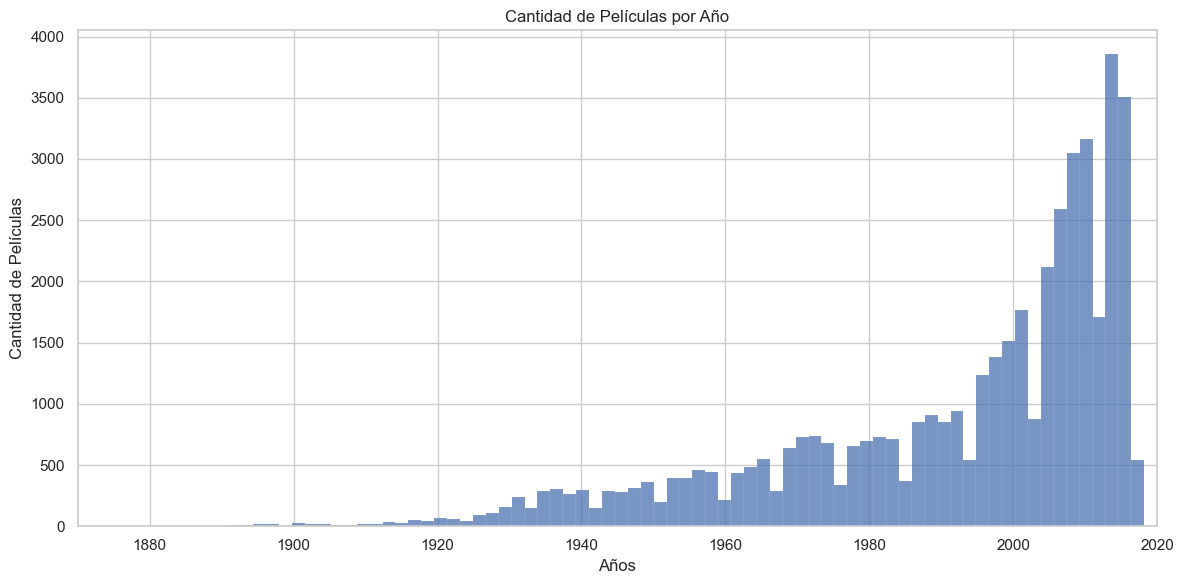

In [69]:
plt.figure(figsize=(12,6))
sns.histplot(movies.release_year)
plt.xlim((1870,2020))
plt.xlabel('Años')
plt.ylabel('Cantidad de Películas')

# Título del gráfico
plt.title('Cantidad de Películas por Año')

plt.grid(True)  # Agregar una cuadrícula
plt.tight_layout()  # Ajustar el espaciado

plt.show()

A través de este gráfico, se podría deducir que al consultarle a la API en busca de recomendaciones para películas antiguas, es probable que se obtengan pocas opciones disponibles.

In [70]:
# Filtro por los años que no sean nulos ni ceros
peliculas_sin_animaciones = movies.movie_id.loc[(movies.release_year < 1985) & (movies.release_year.isnull() == False) & (movies.release_year != 0)].count()
peliculas_con_animaciones = movies.movie_id.loc[(movies.release_year > 1985) & (movies.release_year.isnull() == False) & (movies.release_year != 0)].count()

# Calculo el número total de peliculas validas en el dataset
total_peliculas = movies.movie_id.loc[(movies.release_year.isnull() == False) & (movies.release_year != 0)].count()

# Veo la respresentación de esos valores pero en porcentaje
porcentaje_sin_animaciones = (peliculas_sin_animaciones / total_peliculas) * 100
porcentaje_con_animaciones = (peliculas_con_animaciones / total_peliculas) * 100


print('Cantidad de películas sin animaciones:', peliculas_sin_animaciones)
print('Cantidad de películas con animaciones:', peliculas_con_animaciones)
print('')
print('Porcentaje de películas sin animaciones en el dataset:', round(porcentaje_sin_animaciones, 2), '%')
print('Porcentaje de películas con animaciones en el dataset:', round(porcentaje_con_animaciones, 2), '%')


Cantidad de películas sin animaciones: 13574
Cantidad de películas con animaciones: 31402

Porcentaje de películas sin animaciones en el dataset: 29.94 %
Porcentaje de películas con animaciones en el dataset: 69.25 %


#### Me interesa realizar una **Nube de palabras** para comprender cuales son las palabras con mayor frecuencia en los titulos de las peliculas, siendo las mas grandes mas repetidas y las mas pequeñas obviamente menos

In [71]:
from wordcloud import WordCloud # Es posible gracias la modulo de wordcloud

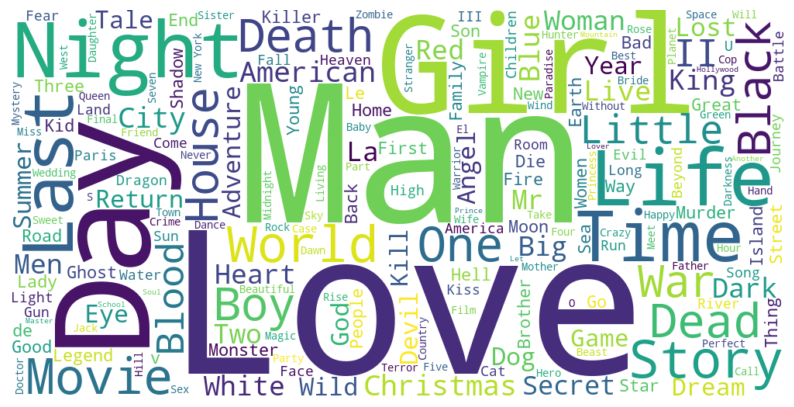

In [72]:
palabras_peliculas = ' '.join(movies.title) # Concateno todas las palabras de todos los titulos espaciadas por un caracter vacio
#Genero la nube con todas las palabras
nube = WordCloud(width=1000,height=500, background_color='white').generate(palabras_peliculas)

# Visualizo la nuve de palabras
plt.figure(figsize=(10,7))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

Claramente hay un gran numero de peliculas que contienen en sus titulos las palabras 'Love', 'Man', 'Girl', 'Day', 'Time' entre otras.

*Esto sirve como para tener un primer pantallazo de que tipo de peliculas hay en el dataset*. Por ejemplo, viendo rapido la nube de palabras puedo deducir que existe una gran cantidad de peliculas romanticas de amor (Love, Girl, Life) o que tambien por ejemlo peliculas de terror o medio (Nigth, Black, Dead, Blood)

In [73]:
# Veo los géneros que mas contienen la palabra 'Love'
movies.genres.loc[movies.title.str.contains('Love')].value_counts()

Drama|Romance           109
Drama                    92
Comedy|Romance           91
Comedy|Drama|Romance     58
Comedy                   47
                       ... 
Comedy|Music|War          1
Comedy|Drama|Foreign      1
Crime|Drama|Thriller      1
Documentary|Foreign       1
Mystery|TV Movie          1
Name: genres, Length: 159, dtype: int64

### Busqueda de valores atipicos (*outliers*)

Con un grafico de diagrama de cajas, el *boxplot*, se pueden reflejar de manera visual los outliers que tiene una columna en los 'bigotes' de la caja.

In [74]:
movies.dtypes

belongs_to_collection         object
budget                       float64
genres                        object
movie_id                       int64
original_language             object
overview                      object
popularity                   float64
production_companies          object
production_countries          object
release_date                  object
revenue                      float64
runtime                      float64
spoken_languages              object
tagline                       object
title                         object
vote_average                 float64
vote_count                   float64
production_countries_code     object
release_year                   int64
release_month                  int64
release_day                    int64
return                       float64
director                      object
actors                        object
dtype: object

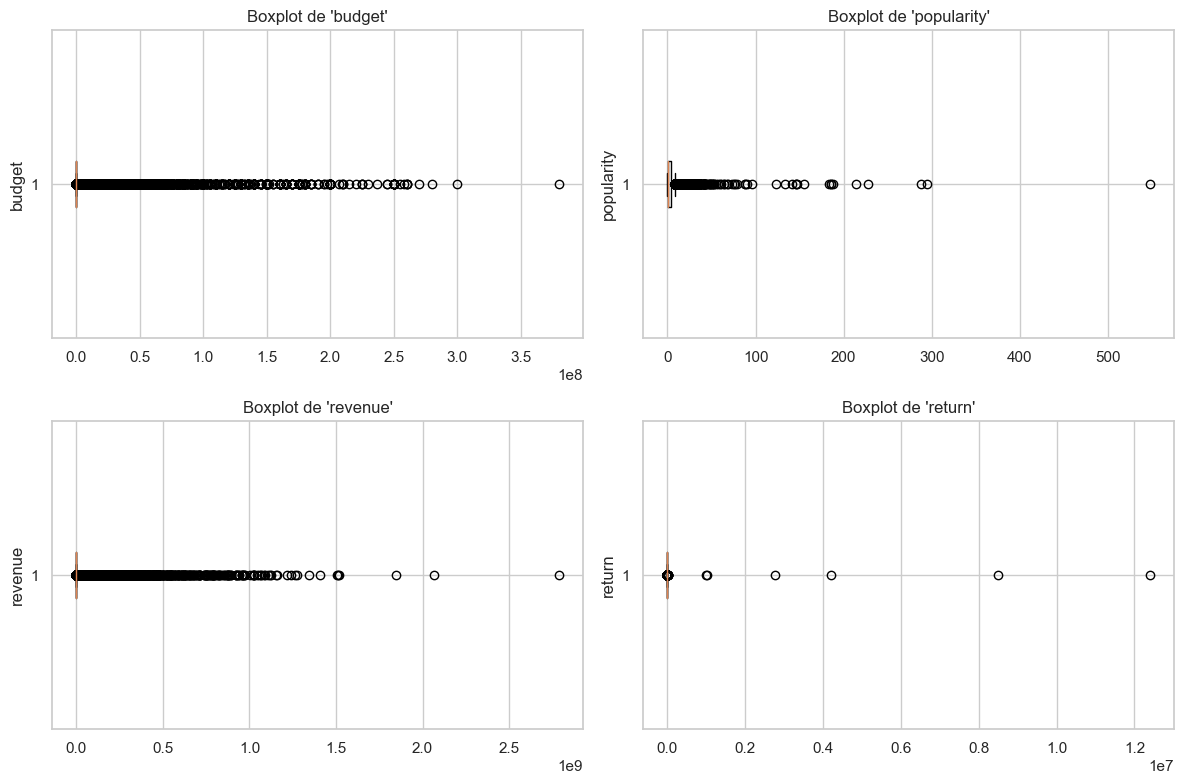

In [75]:
# Columnas que voy a analizar
columnas = ['budget', 'popularity', 'revenue', 'return']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Itera sobre las columnas y los subplots
for ax, columna in zip(axes.flatten(), columnas):
    # Creo el boxplot en el subplot correspondiente
    ax.boxplot(movies[columna], vert=False)  # vert=False para mostrar las variables en el eje y
    ax.set_ylabel(columna) 
    ax.set_title("Boxplot de '" + columna + "'")

plt.tight_layout() # Ajusta los espacios entre subplots
plt.show()

#### Ahora busco los outliers mediante el 'z-score' cuando los valores son mayor a 3 (regla de tres sigmas)

In [76]:
from scipy.stats import zscore

# Analizo la columa 'budget'
z_scores = zscore(movies['budget'])
outliers_budget = movies[abs(z_scores) > 3]
outliers_budget

,belongs_to_collection,budget,genres,movie_id,original_language,overview,popularity,production_companies,production_countries,release_date,...,title,vote_average,vote_count,production_countries_code,release_year,release_month,release_day,return,director,actors
1,NaN,65000000.0,Adventure|Family|Fantasy,8844,en,When siblings Judy and Peter discover an encha...,17.015539,Interscope Communications|Teitler Film|TriStar...,United States of America,1995-12-15,...,Jumanji,6.9,2413.0,US,1995,12,15,4.043035,Joe Johnston,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
5,NaN,60000000.0,Action|Crime|Drama|Thriller,949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,Forward Pass|Regency Enterprises|Warner Bros.,United States of America,1995-12-15,...,Heat,7.7,1886.0,US,1995,12,15,3.123947,Michael Mann,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...
6,NaN,58000000.0,Comedy|Romance,11860,en,An ugly duckling having undergone a remarkable...,6.677277,Constellation Entertainment|Mirage Enterprises...,Germany|United States of America,1995-12-15,...,Sabrina,6.2,141.0,DE|US,1995,12,15,0.000000,Sydney Pollack,Harrison Ford|Julia Ormond|Greg Kinnear|Angie ...
9,James Bond Collection,58000000.0,Action|Adventure|Thriller,710,en,James Bond must unmask the mysterious head of ...,14.686036,Eon Productions|United Artists,United Kingdom|United States of America,1995-11-16,...,GoldenEye,6.6,1194.0,GB|US,1995,11,16,6.072311,Martin Campbell,Pierce Brosnan|Sean Bean|Izabella Scorupco|Fam...
10,NaN,62000000.0,Comedy|Drama|Romance,9087,en,"Widowed U.S. president Andrew Shepherd, one of...",6.318445,Castle Rock Entertainment|Columbia Pictures,United States of America,1995-11-17,...,The American President,6.5,199.0,US,1995,11,17,1.739992,Rob Reiner,Michael Douglas|Annette Bening|Michael J. Fox|...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44192,NaN,60000000.0,Comedy|Drama|War,354287,en,A rock star general bent on winning the “impos...,10.282732,Netflix|Plan B Entertainment,United States of America,2015-06-04,...,War Machine,5.8,243.0,US,2015,6,4,0.000000,David Michôd,Brad Pitt|Anthony Hayes|John Magaro|Anthony Mi...
44226,NaN,197471676.0,Action|Adventure|Science Fiction,339964,en,"In the 28th century, Valerian and Laureline ar...",15.262706,EuropaCorp,France,2016-06-06,...,Valerian and the City of a Thousand Planets,6.7,905.0,FR,2016,6,6,0.455885,Luc Besson,Dane DeHaan|Cara Delevingne|Clive Owen|Rihanna...
44567,NaN,100000000.0,Action|Drama|History|Thriller|War,374720,en,The miraculous evacuation of Allied soldiers f...,30.938854,Canal+|Kaap Holland Film|RatPac-Dune Entertain...,France|Netherlands|United Kingdom|United State...,2017-09-22,...,Dunkirk,7.5,2712.0,FR|GB|NL|US,2017,9,22,5.198769,Christopher Nolan,Fionn Whitehead|Tom Glynn-Carney|Jack Lowden|H...
44728,Transformers Collection,260000000.0,Action|Adventure|Science Fiction|Thriller,335988,en,"Autobots and Decepticons are at war, with huma...",39.186819,Angry Films|Di Bonaventura Pictures|Hasbro Stu...,United States of America,2015-07-02,...,Transformers: The Last Knight,6.2,1440.0,US,2015,7,2,2.326701,Michael Bay,Mark Wahlberg|Josh Duhamel|Laura Haddock|Antho...


Expando la columna 'genres' con el metodo *.explode()* para ver todos los valores

In [77]:
movies.genres = movies.genres.str.split('|')
exploded_genres = movies.genres.explode()

Inserto en un diccionario todos los géneros de la columna

In [78]:
movies_genres = {k:[] for k in exploded_genres if not pd.isna(k)} # Elimino la clave que se me genero por los valores vacios
del movies_genres['0.0'] # Elimino el ultimo valor que es 0.0, no es un género valido 

#### Voy a contar cuantas peliculas tiene cada género, para despues poder hacer una grafica y visualizar mejor los resultados

In [79]:
for key in movies_genres:
    # Busco cuantas peliculas tiene es su genero a la key y agrego esa cantidad al diccionario al genero que le corresponde
    cantidad = movies.movie_id.loc[movies.genres.fillna(' ').astype(str).str.contains(key)].count()
    movies_genres[key] = cantidad

In [80]:
movies_genres

{'Animation': 1928,
 'Comedy': 13175,
 'Family': 2765,
 'Adventure': 3488,
 'Fantasy': 2309,
 'Romance': 6727,
 'Drama': 20232,
 'Action': 6588,
 'Crime': 4302,
 'Thriller': 7613,
 'Horror': 4668,
 'History': 1397,
 'Science Fiction': 3037,
 'Mystery': 2461,
 'War': 1321,
 'Foreign': 1618,
 'Music': 1597,
 'Documentary': 3918,
 'Western': 1042,
 'TV Movie': 765}

Ordeno las claves del diccionario con los géneros de manera descendente en función de los valores

In [81]:
movies_genres = dict(sorted(movies_genres.items(), key=lambda x: x[1], reverse=True))

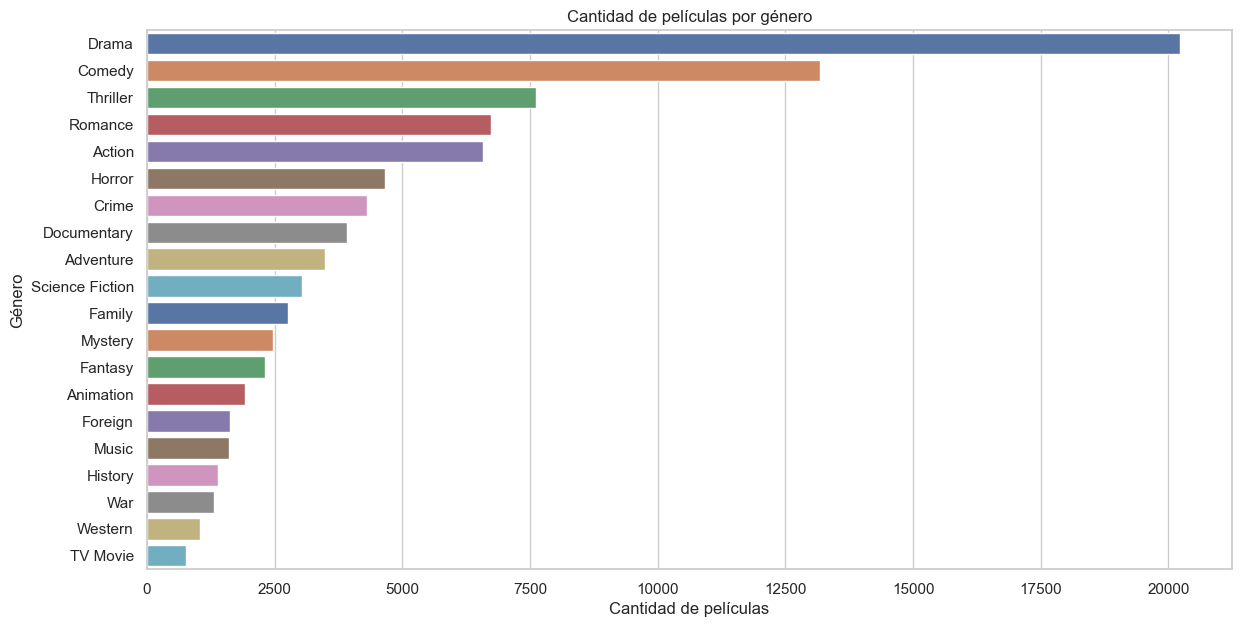

In [82]:
plt.figure(figsize=(14,7))
sns.barplot(x=list(movies_genres.values()), y= list(movies_genres.keys()), palette='deep')
plt.ylabel('Género')
plt.xlabel('Cantidad de películas')
plt.title('Cantidad de películas por género')
plt.xticks(rotation=0)
plt.show()

##### Teniendo en cuenta que el dataset contiene alrededor de 45000 peliculas, con este grafico me doy cuenta que mas o menos la mitad de las peliculas,<mark> es decir **casi el 50% son de género Drama (20000 aprox) y mas o menos un cuarto del total de peliculas son de genero Comedia.**</mark>

Con esta estaditica podria deducir que el sistema de recomendación podria funcionar mejor para estos generos que tienen varias peliculas que con las peliculas de los géneros TV Movie o Western ya que su población en el dataset es escasa

Ahora hago lo mismo para la columna de 'production_countries'

In [83]:
movies.production_countries = movies.production_countries.str.split('|')
exploded_countries = movies.production_countries.explode()

In [84]:
countries = {k:[] for k in exploded_countries.unique() if not pd.isna(k)} # Elimino la clave que se me género por los valores vacios

In [85]:
for key in countries:
    cantidad = movies.movie_id.loc[movies.production_countries.fillna(' ').astype(str).str.contains(key)].count()
    countries[key] = cantidad

countries

{'United States of America': 21133,
 'Germany': 2255,
 'United Kingdom': 4088,
 'France': 3930,
 'Italy': 2165,
 'Spain': 964,
 'China': 372,
 'Australia': 570,
 'South Africa': 125,
 'Canada': 1765,
 'Switzerland': 254,
 'Belgium': 446,
 'Japan': 1645,
 'Iran': 104,
 'Netherlands': 375,
 'Hong Kong': 596,
 'Tunisia': 17,
 'Ireland': 225,
 'Dominican Republic': 8,
 'Croatia': 78,
 'Russia': 911,
 'Macedonia': 15,
 'Austria': 209,
 'Taiwan': 129,
 'New Zealand': 123,
 'Mexico': 328,
 'Poland': 318,
 'Peru': 30,
 'Cuba': 25,
 'Liechtenstein': 8,
 'Denmark': 384,
 'Portugal': 128,
 'Finland': 380,
 'Sweden': 586,
 'Argentina': 254,
 'Iceland': 68,
 'South Korea': 494,
 'Czech Republic': 209,
 'Hungary': 175,
 'Serbia': 109,
 'India': 826,
 'Brazil': 291,
 'Greece': 169,
 'Congo': 4,
 'Senegal': 14,
 'Burkina Faso': 10,
 'Romania': 142,
 'Philippines': 83,
 'Vietnam': 10,
 'Trinidad and Tobago': 2,
 'Bulgaria': 56,
 'Chile': 68,
 'Norway': 201,
 'Kazakhstan': 23,
 'Algeria': 13,
 'Luxembou

#### Como obtuve un diccionario bastante largo con varios paises, lo voy a filtrar por aquellos que solo tengan mas de 150 peliculas en el dataset

In [86]:
countries = {k: v for k,v in countries.items() if v >= 170}
countries

{'United States of America': 21133,
 'Germany': 2255,
 'United Kingdom': 4088,
 'France': 3930,
 'Italy': 2165,
 'Spain': 964,
 'China': 372,
 'Australia': 570,
 'Canada': 1765,
 'Switzerland': 254,
 'Belgium': 446,
 'Japan': 1645,
 'Netherlands': 375,
 'Hong Kong': 596,
 'Ireland': 225,
 'Russia': 911,
 'Austria': 209,
 'Mexico': 328,
 'Poland': 318,
 'Denmark': 384,
 'Finland': 380,
 'Sweden': 586,
 'Argentina': 254,
 'South Korea': 494,
 'Czech Republic': 209,
 'Hungary': 175,
 'India': 826,
 'Brazil': 291,
 'Norway': 201}

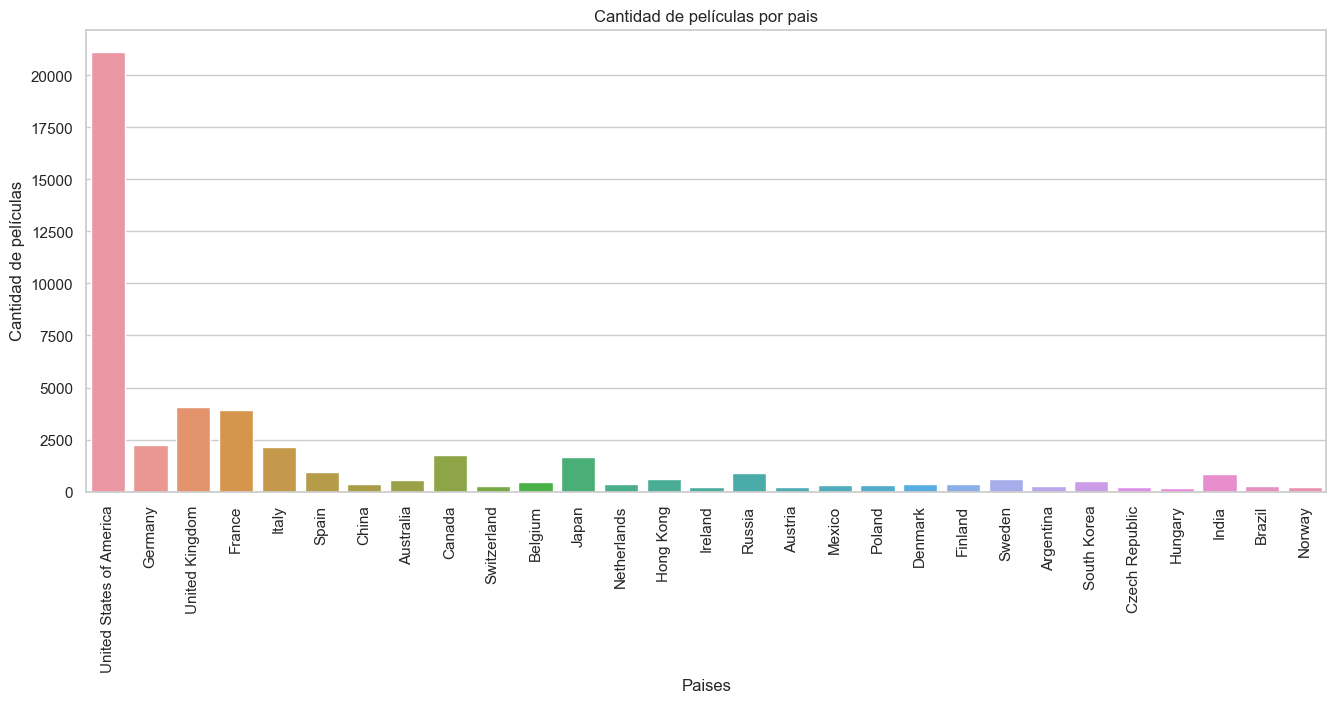

In [87]:
plt.figure(figsize=(16,6))
sns.barplot(x=list(countries.keys()), y= list(countries.values()))
plt.xlabel('Paises')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas por pais')
plt.xticks(rotation=90)
plt.show()

##### Con los paises sucede lo mismo. **Mas del 50% de las peliculas estan hechas por Estados Unidos y logran destacar un poco tambien los paises como Reino Unido y Francia pero con un número de peliculas muchisimo menor al de Estados Unidos**. Con esta información, puedo afirmar que el modelo de machine Learning va a ser mas capaz al momento de consultarle por alguna pelicula Estadounidense que por los otros paises.

#### Creo una columna para las decadas

In [88]:
def get_decade(year):
    return str((year // 10) * 10) + 's'

movies['release_decade'] = movies.release_year.apply(get_decade) # Creo la columna 'release_decade'

### Hago un grafico que muestre la cantidad de peliculas que se estrenaron en cada decada

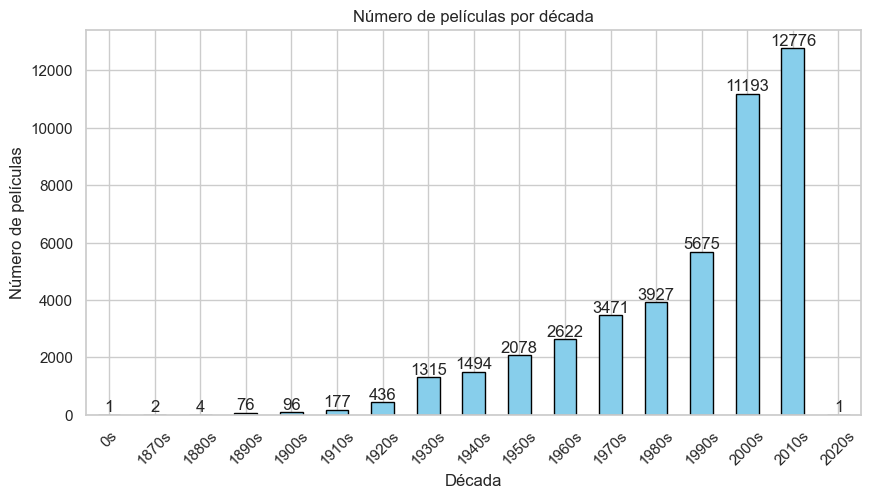

In [89]:
peliculas_decada = movies.release_decade.value_counts().sort_index()

plt.figure(figsize=(10, 5))

ax = peliculas_decada.plot(kind='bar', color='skyblue', edgecolor='black')
ax.set_xlabel('Década')
ax.set_ylabel('Número de películas')
ax.set_title('Número de películas por década')

# Le agrego la cantidad de peliculas en cada barra para una mejor comprension
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.xticks(rotation=45)

plt.show()

    Se observa una mayor cantidad de peliculas en el dataset a medida que nos acercamos a los años más recientes.

### Ahora realizaré una ***matriz de correlación*** para las columnas numericas

In [90]:
movies.select_dtypes('number').head()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_day,return
0,30000000.0,862,21.946943,373554033.0,81.0,7.7,5415.0,1995,10,30,12.451801
1,65000000.0,8844,17.015539,262797249.0,104.0,6.9,2413.0,1995,12,15,4.043035
2,0.0,15602,11.712900,0.0,101.0,6.5,92.0,1995,12,22,0.000000
3,16000000.0,31357,3.859495,81452156.0,127.0,6.1,34.0,1995,12,22,5.090760
4,0.0,11862,8.387519,76578911.0,106.0,5.7,173.0,1995,2,10,0.000000


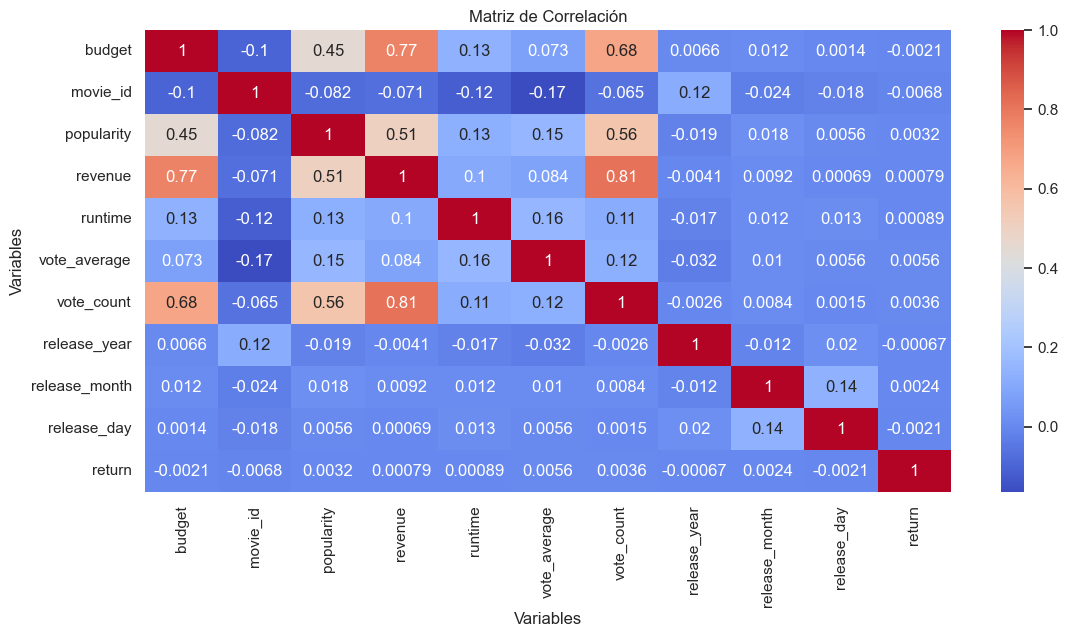

In [91]:
correlation_matrix = movies.select_dtypes('number').corr()
plt.figure(figsize=(13, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=90)
plt.show()

#### Veo cuales son los generos que tienen mejor valoracion de 'vote_avergare'

In [104]:
rating_genres = {}

for key in movies_genres.keys():
    # Crear una serie booleana para verificar si el género está presente en cada película
    genre_mask = movies['genres'].fillna(' ').apply(lambda x: key in x)

    # Filtrar las películas por género y calcular la valoración promedio
    genre_ratings = movies.loc[genre_mask, 'vote_average']
    avg_rating = genre_ratings.mean()
    rating_genres[key] = avg_rating

In [105]:
rating_genres = pd.Series(rating_genres).sort_values() # Ordeno de manera ascendente en función de los valores

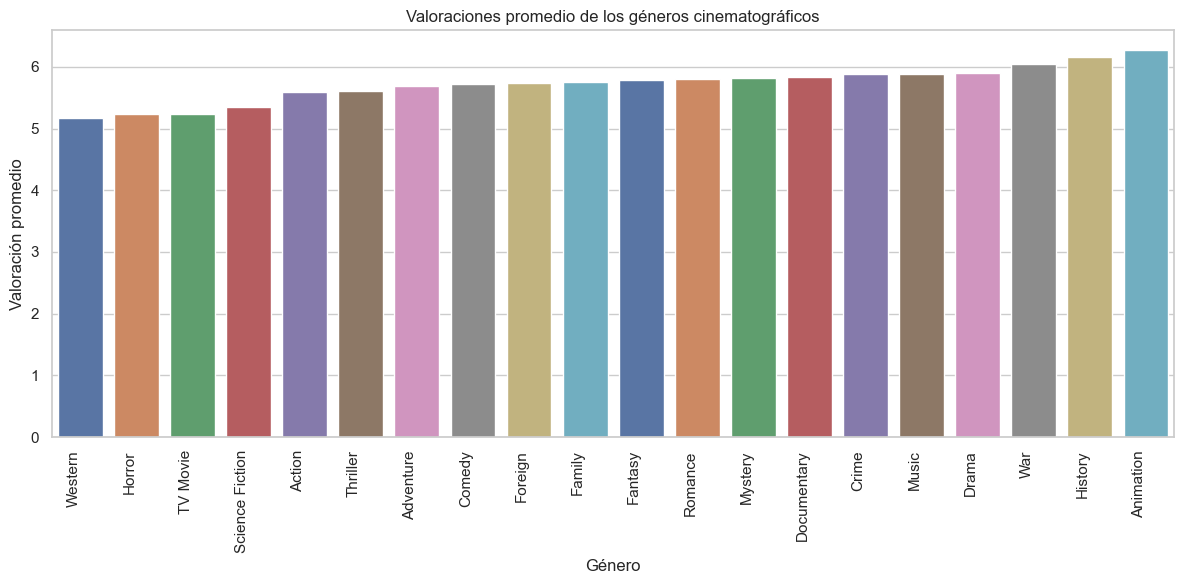

In [108]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(rating_genres.keys()), y=list(rating_genres.values), palette='deep')
plt.xlabel('Género')
plt.ylabel('Valoración promedio')
plt.title('Valoraciones promedio de los géneros cinematográficos')
plt.xticks(rotation=90, ha='right')  # Ajustar la rotación y alineación de las etiquetas del eje x
plt.tight_layout()  # Ajustar los espacios entre los elementos del gráfico
plt.show()

---

## <mark> **Conclusión del EDA** </mark>
Despues de haber analizado este proceso, puedo obtener varias conclusiones sobre los datos que estoy tratando

- Pude **identificar valores perdidos en varias columnas**, siendo la columna "belongs_to_collection" la que tenia el mayor porcentaje de valores faltantes.

- Al examinar la **distribución de las variables numericas**, encontré que algunas presentan una distribución simétrica, mientras que otras muestran asimetría.

- Realicé un analisis temporal utilizando la columna "release_year" (año de estreno) para identificar la **extensión temporal de los datos**. A partir de esto, obtuve que el dataset contiene 146 de información sobre peliculas, la mayoria pertenecientes al siglo XXI (21).

- A traves de un conteo de películas con y sin animaciones en función del año de lanzamiento, pude identificar el **porcentaje de peliculas con animaciones en el conjunto de datos**.

- Desarrollé gráficos de diagrama de cajas (boxplots) para detectar la presencia de outliers en las variables numéricas. Esto ayudó a **identificar valores atípicos** en las columnas "budget", "popularity", "revenue" y "return".

- Gracias al modulo de wordcloud cree una **nube de palabras** para visualizar las palabras más frecuentes en los títulos de las películas, lo que brinda una idea general de los temas y géneros presentes en el conjunto de datos.

- Con la ayuda de una matriz de correlación, obtuve las **correlaciones que tienen entre si las columnas numericas**. 

- Examiné los géneros de las películas y realicé nuevamente un conteo de la **cantidad de películas por género**. Me di cuenta que el género "Drama" es el más frecuente, seguido de "Comedia"